# Exercise 1: *In silico* color mixing and optimization

This is the first full color mixing exercise in the course Autonomous materials discovery (47332). 

In this exercise you will explore the `SilicoColorMixer` python class and get familiarity with common optimizers. You should by now know to basic principles of optimizers and some standard ones.

The reason for using the `SilicoColorMixer` in this course is that you can experiment with your code without having to wait for the LEGO robot. You should thus experience, that code produced in this exercise will be very useful and easy to transfer to later exercises involving the robot. Towards the end of the course, you will also use the *in silico* model in combination with the LEGO robot for improved performance. 

## Exercise 1.1: Get familiar with `SilicoColorMixer`

Before getting ahead of yourselves, let us look at the `SilicoColorMixer`. Start by importing it.

In [1]:
from silico_color_mixer import SilicoColorMixer

Let us see the description of the `SilicoColorMixer` class. Place your cursor in the above cell and press `Shift`+`Tab`. This will open a new window below the cell showing you some of the possible inputs and default parameters for the class. You can see all possible inputs and the Docstring, which describes the class, by clicking on the plus or up-arrow in the corner of the window. The output will look something like this:

Lets go over the possible inputs one by one:

* noise: This can either be `False` or a dictionary like the default one and must contain the entries `'color'`, `'volume'`, and `'measurement'`. You can read about each of them in the Docstring above.
* colors: A list with the names of the colors we will be using. To be transferable to the LEGO robot, this list should contain 4 colors, but **can** contain from one and up. We will discuss default colors in a second.  
* color_codes: If you are not satisfied with the default colors or which to change the rgb color code for a given instance of the mixer, you can do so by specifying colors and their rgb color codes. Normally, you would not want to set this keyword. 
* target: This is not actually used by the color mixer, but can be returned by the `run_cuvette` method such that the output can be in the same format as the output from the `run_cuvette(read_target=True)` method on the LEGO robot. Note that the rgb color code input should be of the form (r,g,b). 

Before initializing an instance of the mixer, let us take a look at the default colors of the class. Do this by running the cell below

In [2]:
SilicoColorMixer.default_color_codes

{'yellow_t': [249, 242, 30],
 'red_t': [220, 35, 40],
 'blue_t': [54, 59, 212],
 'green_t': [73, 213, 5],
 'red_u': [220, 35, 40],
 'yellow_u': [249, 242, 30],
 'green_u': [73, 213, 5],
 'purple_u': [214, 39, 249]}

We have 8 default colors, although you might note that some of them have identical rgb color codes. The color codes are given as lists rather than tuple, e.g., `(249, 242, 30)`. The names of the colors represent the 8 physical colors we have available for the robot. `_u` denotes that the color is purchased from [Urtegården](https://www.urtegaarden.dk/farver). `_t` denotes that it is made by [Tørsleffs](https://www.torsleffs.dk/produkter/farve-gul/).

Now, let us create an instance of the mixer. Although we will be using the default parameters, we write them out for comprehension. Note that since all inputs are keyword arguments, the order does not matter.

In [3]:
mixer0 = SilicoColorMixer(colors=['red_u', 'green_u', 'blue_t', 'yellow_u'],
                         noise={'colors': 1, 'volume': 0.02, 'measurement': 2},
                         target=None,
                         color_codes={},)

Although the order the keywords do not matter, the order of colors in the `colors` list does if we want a simple conceptual 1:1 mapping to the robot. The first color in the list, is the color in the first color cartridge from the left and so forth. Once you move to the LEGO robot it is paramount for reuseability of data that the `colors` list matches what is in the color cartridges.

Now lets go ahead and mix a color like we did in exercise 0. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

(220.0, 31.0, 40.0)


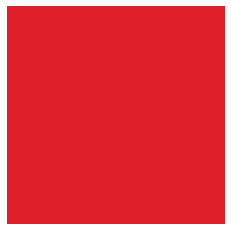

In [5]:
input_volumes=[1.0, 0.0, 0.0, 0.0]
output_color = mixer0.run_cuvette(input_volumes)
print(output_color)
plt.axis('off')
plt.imshow(np.array([[output_color]], dtype=np.uint8))

Before letting you run free to experiment on your own I would like to showcase the noise. Noise is added to the class to make it more similar to a real system. I will ramp it up just to show you the effect.

In [6]:
mixer = SilicoColorMixer(noise={'colors': 10, 'volume': 0.1, 'measurement': 10},)

I will then try to mix the same color multiple times - an attempt at equal parts red and yellow - and and show you the difference.

Mix 0 = (235.0, 117.0, 23.0)
Mix 1 = (243.0, 163.0, 37.0)
Mix 2 = (212.0, 155.0, 45.0)
Mix 3 = (227.0, 129.0, 26.0)
Mix 4 = (226.0, 147.0, 34.0)
Mix 5 = (239.0, 115.0, 57.0)
Mix 6 = (248.0, 122.0, 49.0)
Mix 7 = (229.0, 143.0, 42.0)
Mix 8 = (224.0, 141.0, 41.0)
Mix 9 = (249.0, 140.0, 50.0)


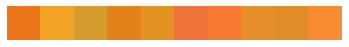

In [7]:
mixed_colors = []
input_volumes=[1.0, 0.0, 0.0, 1.0]
for n in range (10):
    color = mixer.run_cuvette(input_volumes)
    print(f'Mix {n} =', color)
    mixed_colors.append(color)

plt.axis('off')
plt.imshow(np.array([mixed_colors], dtype=np.uint8))

Now it is your turn to shine. Use the below cells to experiment with the `SilicoColorMixer` and insert more if needed. Make a figure like the one produced by the cell above, but instead of 10 shades of orange, make a rainbow.

In [8]:
# my_mixer = SilicoColorMixer(...

# Exercise 1.2: Difference from target

Next up we will be working with a target color.

In [9]:
target0 = (220, 141, 50)
mixer_w_target = SilicoColorMixer(noise={'colors': 2, 'volume': 0.02, 'measurement': 2}, target=target0)

We will now do as before but with `read_target=True` in the `run_cuvette` method. This will yield two outputs, which we store in 2 different variables, `color` and `target`.

Mix = (68.0, 210.0, 4.0) Target = (220, 141, 50)


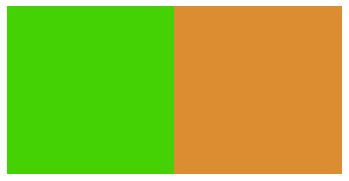

In [10]:
input_volumes = [0., 1., 0., 0.]
color, target = mixer_w_target.run_cuvette(input_volumes, read_target=True)
print('Mix =', color, 'Target =', target)
plt.axis('off')
plt.imshow(np.array([[color,target]], dtype=np.uint8))

It is evident that the mixed color and the target color are very different. But **how** different are they?

To answer this **you** will now write a function that takes the color (r, g, b) and target (r, g, b) as inputs and returns some quantitative measure for the difference. To get you started, you can get inspiration from the cell below, which contains a function that takes (r, g, b) tuples (or lists, arrays, etc.) as `input_color1` and `input_color2`and returns the squared value of the red channel of `input_color1`, red$^2$ -- a **very poor** measure for the difference between the two colors across all channels. Try making a function that returns the root summed squared error for each of the r, g, b channels, $\sqrt((\delta r)^2+(\delta g)^2+(\delta b)^2)$

In [11]:
def red_squared(input_color1, input_color2):
    r_color, g_color, b_color = input_color1[0], input_color1[1], input_color1[2]
    red2 = r_color**2
    return red2
    
red_squared((68, 216, 5), (68, 216, 5))

4624

In [12]:
# def your_function():
#     ...

In [13]:
# TEACHER
def root_sum_sqr_err(input1, input2):
    """The sum of squared difference between input colors"""
    dif = np.asarray(input1)- np.asarray(input2)
    return (sum(dif**2)**(0.5))

root_sum_sqr_err(color, target)

173.1502237942533

Calculate the difference score for a few data points and store them in a list following the example below but using you own "score" function and mixing color combinations of your own choice.

Start by creating an empty list to store data in.

In [14]:
data = []  # empty list for data. Run only once

Run the below cell a few times with different `input_volumes` to generate some data points. Edit such that you use your own score function.

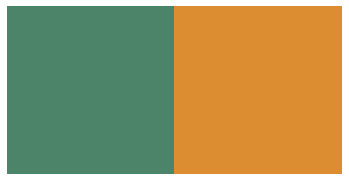

In [15]:
# run a handful of times with different color
input_volumes = [0.5, 5, 5.5, 0.5]
color, target = mixer_w_target.run_cuvette(input_volumes, read_target=True)
# score = red_squared(color, target)  # replace with your function
###  TEACHER
score = root_sum_sqr_err(color, target)
###  TEACHER
data.append([score, list(input_volumes)])
plt.axis('off')
plt.imshow(np.array([[color, target]], dtype=np.uint8))

Take a look at the data you just generated.

In [16]:
print(data)

[[154.76756766196203, [0.5, 5, 5.5, 0.5]]]


Now, lets make a more advanced plot, one showing the calculated difference. First, lets extract the colors we use in the mixer.

In [17]:
base_colors, base_colors_matrix = mixer_w_target.get_colors()
print(base_colors)
print(base_colors_matrix)

['red_t', 'green_t', 'blue_t', 'yellow_t']
[[220.  35.  40.]
 [ 73. 213.   5.]
 [ 54.  59. 212.]
 [249. 242.  30.]]


You will now use an advanced plotting function custom made for this course. You can see the Docstring as before by using `Shift`+`Tab`.

In [18]:
from plot_pie_charts import make_piechart_plot

You should use the data you just generated in the `make_piechart_plot` function. If you do not specify `colors`, it will default to the base colors red, green, blue, and yellow.

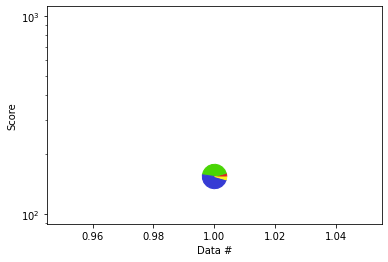

In [19]:
make_piechart_plot(data)

# Exercise 1.3: Optimization

As you now know how to use the color mixer and calculate a difference score, we will use common optimizers find a way to mix the target color. Start by loading in the scipy module. It will install if you do not already have it available. Patience might be required.

In [20]:
import numpy as np
from IPython import display

try:
    from scipy.optimize import minimize
except:
    !pip3 install scipy --user --upgrade
    from scipy.optimize import minimize

The SciPy minimize function will seek to -- drumroll -- determine that input parameters which minimize the outout of a given function. We fist have to make such a function. For simplicity, make it such that it takes only one input argument (multiple keyword arguments are ok). Before trying with the color mixer, try to optimize a very simple function as the one below. 

In [21]:
def parabola_4d(func_input):
    """ input is of format [x, y]"""
    return func_input[0]**2 + func_input[1]**2 +func_input[2]**2 +  func_input[3]**2

Set the initial guess, `x0`.

In [22]:
x0 = [2,-4, 5, 3]

There are countless different optimizers available. The SciPy package has some of the more common once [readily available](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). No two optimizers are the same and they excel at different tasks. You will use the [conjugate gradient optimizer](https://en.wikipedia.org/wiki/Conjugate_gradient_method) in this exercise but we encourage you to experiment with other optimizers in the SciPy package.

Try experimenting the values of  `eps` and `gtol`.

In [23]:
res = minimize(parabola_4d, x0, method='CG', options={'disp': True, 'eps': 0.01, 'maxiter': 3, 'gtol': 1}) 
res.x

Optimization terminated successfully.
         Current function value: 0.000087
         Iterations: 2
         Function evaluations: 30
         Gradient evaluations: 5


array([-0.00332547, -0.00833653, -0.00081995, -0.0024903 ])

The last line are the input values that give the minimum output value. We know the correct answer is `[0 0 0 0]`.

Things will, however, not go so smooth for us when trying to optimize the color mixing. We will run into at least two issues. What are the issues and how do they cause trouble? 

Lets start by removing one of the issues by using the mixer below.

In [24]:
mixer_opt1 = SilicoColorMixer(target=target0, noise=False)

Write a function where a color is mixing with `mixer_opt1` and a score is calculated. Make sure the function will have its lowest value when the difference between the mixed color and target color is as small as possible. Use the cell below for inspiration. 

In [25]:
data = []

In [26]:
def find_color(color_list):
    """Your awesome function"""
    # color, target = mixer_opt1.run_cuvette(...)
    # score = red_squared(color, target)  # Replace with your "score" function
    # data.append(color)
    return score

In [27]:
# TEACHER

def find_color(color_list):
    color, target = mixer_opt1.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    return score

We halfway solve the second issue by changing optimizer such that we now use `L-BFGS-B` optimizer, which accept bounds. Give the function a starting point and run the minimization. Again, you should try different values of `eps` and `gtol` and possibly also `maxiter` this time.

In [28]:
x0 = [0.1, 0.1, 0.1, 0.1]

In [29]:
data=[]

res = minimize(find_color, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 3, 'gtol': 0.1})
res

      fun: 6.684873536630466
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([31.45659912, 20.95109082, 21.77842063,  6.10214583])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 20
      nit: 3
   status: 1
  success: False
        x: array([0.94307965, 0.03370683, 0.11853745, 1.        ])

You cannot see how the optimization is progressing. Edit your `find_color` function such that you can collect data and visualize the optimization. You should produce some nice plots. Below are some cells for you to play with. Add more as needed.

In [30]:
# TEACHER
def find_color(color_list):
    color, target = mixer_opt1.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    data_opt1.append(color)
    data_pie.append([score, list(color_list)])
    return score

In [31]:
# TEACHER
data_opt1=[]
data_pie=[]

res = minimize(find_color, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 3, 'gtol': 0.1})
res

      fun: 6.684873536630466
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([31.45659912, 20.95109082, 21.77842063,  6.10214583])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 20
      nit: 3
   status: 1
  success: False
        x: array([0.94307965, 0.03370683, 0.11853745, 1.        ])

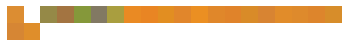

In [32]:
# TEACHER

per_line = 20
data_opt1 = [target0] + [(255.,255.,255.)] +  data_opt1
data_opt_vis = data_opt1 + [(255., 255., 255.)] * ((per_line - len(data_opt1) % per_line))
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/per_line), per_line, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

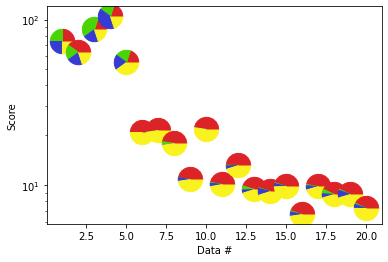

In [33]:
make_piechart_plot(data_pie, colors=base_colors_matrix)
#print(data_pie)

Once you feel like you have some good plots you are ready to try simulating the LEGO robot. The LEGO robot will have to reset or break after every 9 function evalutions due to having filled all mixing cuvettes. We also have to consider noise. Load a mixer with noise.

In [34]:
mixer_opt2 = SilicoColorMixer(target=target0)

Input your `find_color` function in the cell below, update it to use the new mixer renaming it `find_color2`, and run the cell.

In [35]:
# def find_color2(color_list):
#     ...

In [36]:
# TEACHER

data_opt1=[]
data_pie=[]

def find_color2(color_list):
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    data_opt1.append(color)
    data_pie.append([score, list(color_list)])
    return score

It is possible to force the `find_color` function to raise an error after more than 9 function calls, but it is better to set a maximum number of function evaluations in the optimizer if it allows it. Here `maxfun` (what a name!) is given.

In [37]:
res = minimize(find_color2, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 3, 'gtol': 0.1, 'maxfun': 9})
res

      fun: 19.1049731745428
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  12.42016775,   -6.93020535, -115.55138739,  -25.52027817])
  message: b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 10
      nit: 1
   status: 1
  success: False
        x: array([1., 0., 0., 1.])

Not surprisingly, 9 function evaluations is not enough to get anywhere. We can even see that the optimizer actually makes more than 9 evaluations. As you will learn later, the LEGO robot control software would have killed the optimization before even one step could be taken. To prevent this from happening, we force the `find_color2` function to wait for our go-ahead every time 9 function evaluations have been made. go ahead finish the function.

In [38]:
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):  
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    # ...
    # ...
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO - set the next cuvette to 1 here
    return score

In [39]:
# TEACHER
data_opt1=[]
data_pie=[]
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):  
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    data_opt1.append(color)
    data_pie.append([score, list(color_list)])
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO set the next cuvette to 1 here
    return score

It is not all that pretty, but it works. Try it out. Note that with a noisy mixer, getting especially `eps` right is important. 

In [40]:
func_calls=[0]

res = minimize(find_color2, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 5, 'gtol': 0.1, 'maxfun':100})
res

Have cuvettes other than #5 emptied. Then press Enter
Have cuvettes other than #5 emptied. Then press Enter
Have cuvettes other than #5 emptied. Then press Enter
Have cuvettes other than #5 emptied. Then press Enter
Have cuvettes other than #5 emptied. Then press Enter
Have cuvettes other than #5 emptied. Then press Enter


      fun: 7.0710678118654755
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([45.04769091, 50.11978162, 47.18758311, -5.90327113])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 60
      nit: 3
   status: 0
  success: True
        x: array([1.        , 0.09487998, 0.12613799, 1.        ])

Now, update the `find_color2` function such that it produces one or more figures for every 9 function evaluations to help you keep track on the progress. Remember, you can always stop the optimization prematurely if you think you are sufficietly converged.

In [41]:
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):  
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    # ...
    # ...
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        display.clear_output(wait=True) # This will help you remove figures as you go
        # Your figure plot commands
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO - set the next cuvette to 1 here
    return score

In [42]:
# TEACHER
data_opt1=[]
data_pie0=[]
func_calls=[0]

def find_color2(color_list, func_calls=func_calls):
    color, target = mixer_opt2.run_cuvette(color_list, read_target=True)
    score = root_sum_sqr_err(color, target)
    print('color:', color, 'target:', target, 'input:', color_list, 'score:', score)      # NOTICE THIS
    data_opt1.append(color)
    data_pie0.append([score, list(color_list)])
    
    func_calls[0] += 1
    if func_calls[0] % 9 == 0:
        #display.clear_output(wait=True)                 # NOTICE THIS
        plt.axis('off')
        plt.imshow(np.array([data_opt1], dtype=np.uint8))
        make_piechart_plot(data_pie0, colors=base_colors_matrix)
        input('Have cuvettes other than #5 emptied. Then press Enter')
        # When LEGO set the next cuvette to 1 here
    return score

color: (149.0, 138.0, 73.0) target: (220, 141, 50) input: [0.1 0.1 0.1 0.1] score: 74.69270379361026
color: (162.0, 117.0, 66.0) target: (220, 141, 50) input: [0.2 0.1 0.1 0.1] score: 64.77653896280658
color: (129.0, 150.0, 60.0) target: (220, 141, 50) input: [0.1 0.2 0.1 0.1] score: 91.98912979260103
color: (128.0, 119.0, 102.0) target: (220, 141, 50) input: [0.1 0.1 0.2 0.1] score: 107.94443014810908
color: (167.0, 162.0, 63.0) target: (220, 141, 50) input: [0.1 0.1 0.1 0.2] score: 58.47221562417487
color: (236.0, 138.0, 33.0) target: (220, 141, 50) input: [1. 0. 0. 1.] score: 23.53720459187964
color: (237.0, 135.0, 35.0) target: (220, 141, 50) input: [1.1 0.  0.  1. ] score: 23.45207879911715
color: (229.0, 142.0, 36.0) target: (220, 141, 50) input: [1.  0.1 0.  1. ] score: 16.673332000533065
color: (226.0, 142.0, 47.0) target: (220, 141, 50) input: [1.  0.  0.1 1. ] score: 6.782329983125268


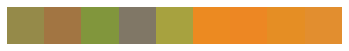

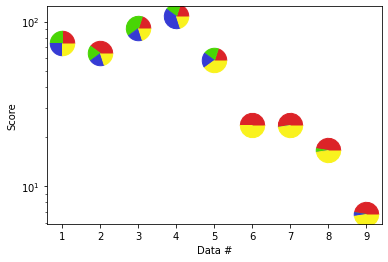

Have cuvettes other than #5 emptied. Then press Enter
color: (237.0, 143.0, 36.0) target: (220, 141, 50) input: [1.  0.  0.  1.1] score: 22.11334438749598
color: (224.0, 135.0, 46.0) target: (220, 141, 50) input: [1.         0.0276515  0.07870906 1.        ] score: 8.246211251235321
color: (222.0, 131.0, 40.0) target: (220, 141, 50) input: [1.1        0.0276515  0.07870906 1.        ] score: 14.2828568570857
color: (220.0, 144.0, 36.0) target: (220, 141, 50) input: [1.         0.1276515  0.07870906 1.        ] score: 14.317821063276353
color: (218.0, 138.0, 47.0) target: (220, 141, 50) input: [1.         0.0276515  0.17870906 1.        ] score: 4.69041575982343
color: (227.0, 139.0, 41.0) target: (220, 141, 50) input: [1.         0.0276515  0.07870906 1.1       ] score: 11.575836902790225
color: (188.0, 125.0, 67.0) target: (220, 141, 50) input: [0.62230371 0.10366494 0.31852959 0.63720811] score: 39.61060464067672
color: (194.0, 128.0, 62.0) target: (220, 141, 50) input: [0.72230371 0

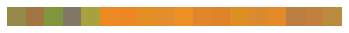

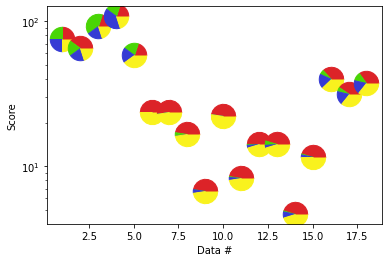

Have cuvettes other than #5 emptied. Then press Enter
color: (181.0, 123.0, 78.0) target: (220, 141, 50) input: [0.62230371 0.10366494 0.41852959 0.63720811] score: 51.273774973177076
color: (195.0, 134.0, 63.0) target: (220, 141, 50) input: [0.62230371 0.10366494 0.31852959 0.73720811] score: 29.03446228191595
color: (218.0, 135.0, 47.0) target: (220, 141, 50) input: [0.90055978 0.04766439 0.14184922 0.90448382] score: 7.0
color: (214.0, 132.0, 48.0) target: (220, 141, 50) input: [1.00055978 0.04766439 0.14184922 0.90448382] score: 11.0
color: (206.0, 140.0, 44.0) target: (220, 141, 50) input: [0.90055978 0.14766439 0.14184922 0.90448382] score: 15.264337522473747
color: (208.0, 132.0, 55.0) target: (220, 141, 50) input: [0.90055978 0.04766439 0.24184922 0.90448382] score: 15.811388300841896
color: (219.0, 141.0, 44.0) target: (220, 141, 50) input: [0.90055978 0.04766439 0.14184922 1.00448382] score: 6.082762530298219
color: (224.0, 139.0, 52.0) target: (220, 141, 50) input: [0.889653

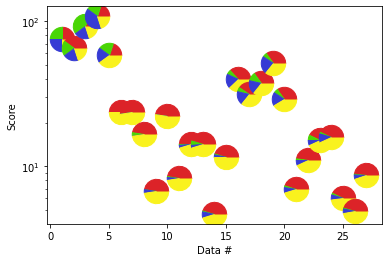

Have cuvettes other than #5 emptied. Then press Enter
color: (213.0, 141.0, 45.0) target: (220, 141, 50) input: [0.88965381 0.12275568 0.11738864 0.92253973] score: 8.602325267042627
color: (209.0, 128.0, 55.0) target: (220, 141, 50) input: [0.88965381 0.02275568 0.21738864 0.92253973] score: 17.74823934929885
color: (223.0, 141.0, 45.0) target: (220, 141, 50) input: [0.88965381 0.02275568 0.11738864 1.02253973] score: 5.830951894845301


      fun: 4.898979485566356
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 38.18818402,  37.03345781, 128.49259864,   9.31972409])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 30
      nit: 4
   status: 1
  success: False
        x: array([0.88965381, 0.02275568, 0.11738864, 0.92253973])

In [43]:
func_calls=[0]

res = minimize(find_color2, x0, method='L-BFGS-B',
               bounds = 4*[[0.0, 1.0]], 
               options={'disp': True, 'eps': 0.1, 'maxiter': 4, 'gtol': 0.1, 'maxfun':60})
res

This ends todays exercise. Good job! 

# TRASH  BELOW

Note, you might want to use a different value of `x`, i.e. the recipe for mixing the target color, than the one resulting from the optimization. If you have saved scores and color_list data, like the type you have used to make the pie charts, you can search through that for the lowest possible score and take that as your result.

In [44]:
# Teacher
idx = np.asarray(data_pie)[:,0].argmin()
print(data_pie[idx])

[6.4031242374328485, [0.9999999999610327, 0.09487998340951871, 0.12613798484711383, 1.1]]


You should see something like this:

Let us just see which colors were found compared to the taget color. First we plot the target color and then all other colors that have been mixed during the optimization.

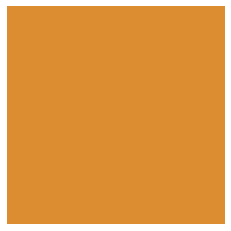

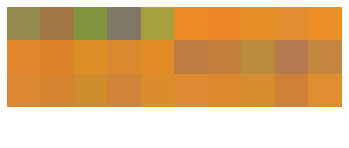

In [45]:
plt.axis('off')
#plt.imshow(np.array([[target0]], dtype=np.uint8))
display.display(plt.imshow(np.array([[target0]], dtype=np.uint8)))
plt.show()
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

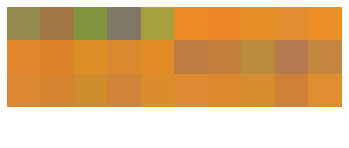

In [46]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

The first issue is the noise. Lets turn that of completely.

In [47]:
mixer_opt1 = SilicoColorMixer(target=target0, noise=False)

The second is that the function we are trying to optimize does not actually have a minimum. `[1,1,1,1] = [0.1, 0.1, 0.1, 0.1]`. The score only depends on the ratio of the inputs and not their numerical value. Some optimizers can accept linear constraints, which would help us, but since that it not generally the case we will instead use a "filter function" that generates a minimum in our function when we multiply the score with the filter value.

We first use a normal distribution as the filter function.

0.06495875944111162

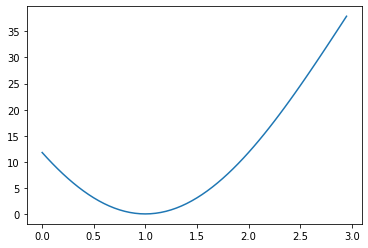

In [48]:
def filter_func(color_list):
    #limit_below = np.any(np.asarray(color_list) <= 0.0)
    #print(limit_below)
    #if limit_below:
    #    return 200
    col_sum = sum(color_list)
    std = 2
    mean = 1
    norm_dist = 1./(std*(2.*np.pi)**0.5)*np.exp(-1./2.*((col_sum-mean)/std)**2)
    return (100-1002*norm_dist/2)

x=np.arange(0,3,0.05)
plt.plot(x,filter_func([x]))
filter_func([1.,0.,0.,0.])

Find another function that could serve as filter.

The new function to minimize is the product of the previous and the filter function.

In [49]:
def find_color_min(color_list):
    #print(color_list, (find_color(color_list)+1) * filter_func(color_list))
    return ((find_color(color_list) + 1) * filter_func(color_list))

In [50]:
x0 = x0/sum(x0)
# x0 = [0.26483819,  0.75270829,  0.96769502, -0.65597114]
x0 = [0.25, 0.25, 0.25, 0.25]

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
data_opt1 = []
res = minimize(find_color, x0, method='CG' , options={'disp': True, 'maxiter':3, 'eps':0.1})# 'gtol': 100, 'eps':0.001})
print(res.x)

In [ ]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

In [ ]:
import time
from IPython import display

for maxi in range(10):
    display.clear_output(wait=True)
    data_opt1 = []
    res = minimize(find_color, x0, method='CG', options={'disp': True, 'maxiter': maxi+1,'eps': 0.1})# 'gtol': 100, 'eps':0.001})
    print(res.x)
    data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
    plt.axis('off')
    data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
    #plt.imshow(np.asarray(data_array, dtype=np.uint8))
    
    display.display(plt.imshow(np.asarray(data_array, dtype=np.uint8)))
    plt.show()
    time.sleep(3)

In [ ]:
try:
    from noisyopt import minimizeCompass
except:
    !pip3 install noisyopt --user --upgrade
    from noisyopt import minimizeCompass

In [ ]:
bounds = 4*[[0.0, 1.0]]

In [ ]:
print(bounds)

In [ ]:
data_opt1 = []
res = minimizeCompass(find_color, bounds=bounds, x0=x0, deltatol=0.1, paired=False, feps=0.1, eps=0.2, disp=True)
#res = minimizeCompass(find_color, x0=x0, deltatol=0.1, paired=False, feps=1, disp=True)

In [ ]:
print(res)

In [ ]:
data_opt_vis = data_opt1 + [(255., 255., 255.)] * (10 - len(data_opt1) % 10)
plt.axis('off')
data_array = np.asarray(data_opt_vis).reshape(int(len(data_opt_vis)/10), 10, 3)
plt.imshow(np.asarray(data_array, dtype=np.uint8))

We thus have to keep our ultimate usecase in mind, i.e., running the LEGO robot, when deciding on an optimizer. The LEGO will have to reset or break after every 9 function evalutions due to having filled all mixing cuvettes and each function evaluation takes minuttes. We thus want an optimizer that uses only few function evaluations.

